# Real Estate Data Analysis

This notebook demonstrates data analysis steps for real estate data collected from Immoweb.

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

# Set visualization style
sns.set_style("whitegrid")


In [3]:
# Load the data
# Replace 'your_cleaned_data.csv' with the path to your dataset
data = pd.read_csv("cleaned_data.csv")

# Preview the data
print(data.head())



    Price Locality Type_of_Property Subtype_of_Property State_of_the_Building  \
0  475000     1800        APARTMENT                LOFT                   NaN   
1  895000     2000        APARTMENT              DUPLEX                   NaN   
2  685000     1180        APARTMENT           PENTHOUSE        JUST_RENOVATED   
3  289000     8680        APARTMENT           APARTMENT        JUST_RENOVATED   
4  775000     2980            HOUSE               VILLA         TO_BE_DONE_UP   

   Number_of_Rooms  Living_Area  Fully_Equipped_Kitchen  Furnished  Open_fire  \
0                3        400.0                       0        NaN        NaN   
1                3        286.0                       1        NaN        NaN   
2                2        127.0                       0        NaN        NaN   
3                3        120.0                       0        NaN        NaN   
4                4        350.0                       0        0.0        NaN   

   Terrace  Terrace_Area  

In [13]:
print(data.info())
#print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24396 entries, 0 to 24395
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      24396 non-null  int64  
 1   Locality                   24396 non-null  object 
 2   Type_of_Property           24396 non-null  object 
 3   Subtype_of_Property        24396 non-null  object 
 4   State_of_the_Building      20601 non-null  object 
 5   Number_of_Rooms            24396 non-null  int64  
 6   Living_Area                23507 non-null  float64
 7   Fully_Equipped_Kitchen     24396 non-null  int64  
 8   Furnished                  11097 non-null  float64
 9   Open_fire                  1030 non-null   float64
 10  Terrace                    16502 non-null  float64
 11  Terrace_Area               10180 non-null  float64
 12  Garden                     5582 non-null   float64
 13  Garden_Area                5582 non-null   flo

In [14]:
# Descriptive Statistics
# Summary statistics for numeric variables
print(data.describe())

# Value counts for categorical variables
if 'Locality' in data.columns:
    print(data['Locality'].value_counts())


              Price  Number_of_Rooms   Living_Area  Fully_Equipped_Kitchen  \
count  2.439600e+04     24396.000000  23507.000000            24396.000000   
mean   4.640561e+05         2.868052    167.822010                0.188883   
std    4.890346e+05         1.560323    146.631482                0.391424   
min    5.000000e+03         0.000000     12.000000                0.000000   
25%    2.450000e+05         2.000000     92.000000                0.000000   
50%    3.433065e+05         3.000000    135.000000                0.000000   
75%    4.980000e+05         4.000000    200.000000                0.000000   
max    1.375000e+07        46.000000   7515.000000                1.000000   

          Furnished    Open_fire  Terrace  Terrace_Area  Garden   Garden_Area  \
count  11097.000000  1030.000000  16502.0  10180.000000  5582.0   5582.000000   
mean       0.086149     2.016505      1.0     25.808939     1.0    604.165890   
std        0.280597    31.127730      0.0     63.81618

In [47]:
data = pd.read_csv("cleaned_data.csv")
data['Living_Area'].max()

np.float64(7515.0)

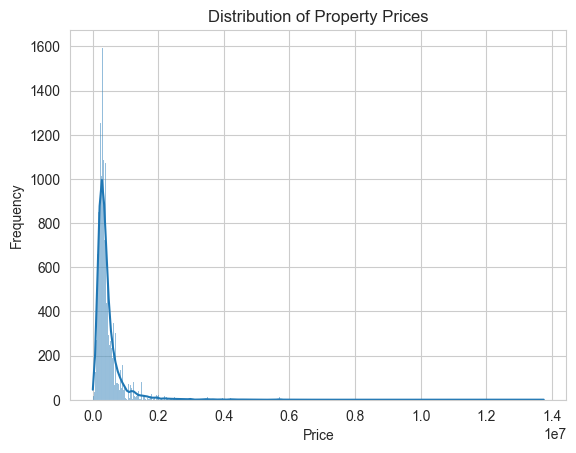

ValueError: The palette dictionary is missing keys: {'APARTMENT', 'HOUSE'}

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Visualize the distribution of property prices
data = pd.read_csv("cleaned_data.csv")
sns.histplot(data['Price'], kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Example: Assume `Property_Type` column categorizes properties as 'House' or 'Apartment'
if 'Living_Area' in data.columns and 'Type_of_Property' in data.columns:
    plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
    sns.scatterplot(
        x='Living_Area', 
        y='Price', 
        data=data, 
        hue='Type_of_Property',  # Use Property_Type to color the points
        palette={'HOUSE': 'green', 'APARTMENT': 'red'}  # Specify colors
    )
    plt.title("Price vs Area (Houses in Green, Apartments in Red)")
    plt.xlabel("Area (sq meters)")
    plt.ylabel("Price (EUR)")
    
    # Limit the x-axis to 2000 sq meters
    plt.xlim(0, 2000)
    
    plt.legend(title="Property Type")  # Add legend with title
    plt.show()


In [22]:
print(data.dtypes)

Price                          int64
Locality                      object
Type_of_Property              object
Subtype_of_Property           object
State_of_the_Building         object
Number_of_Rooms                int64
Living_Area                  float64
Fully_Equipped_Kitchen         int64
Furnished                    float64
Open_fire                    float64
Terrace                      float64
Terrace_Area                 float64
Garden                       float64
Garden_Area                  float64
Surface_of_the_Land          float64
Surface_area_plot_of_land    float64
Number_of_Facades            float64
Swimming_Pool                float64
Disabled_Access              float64
Lift                         float64
dtype: object


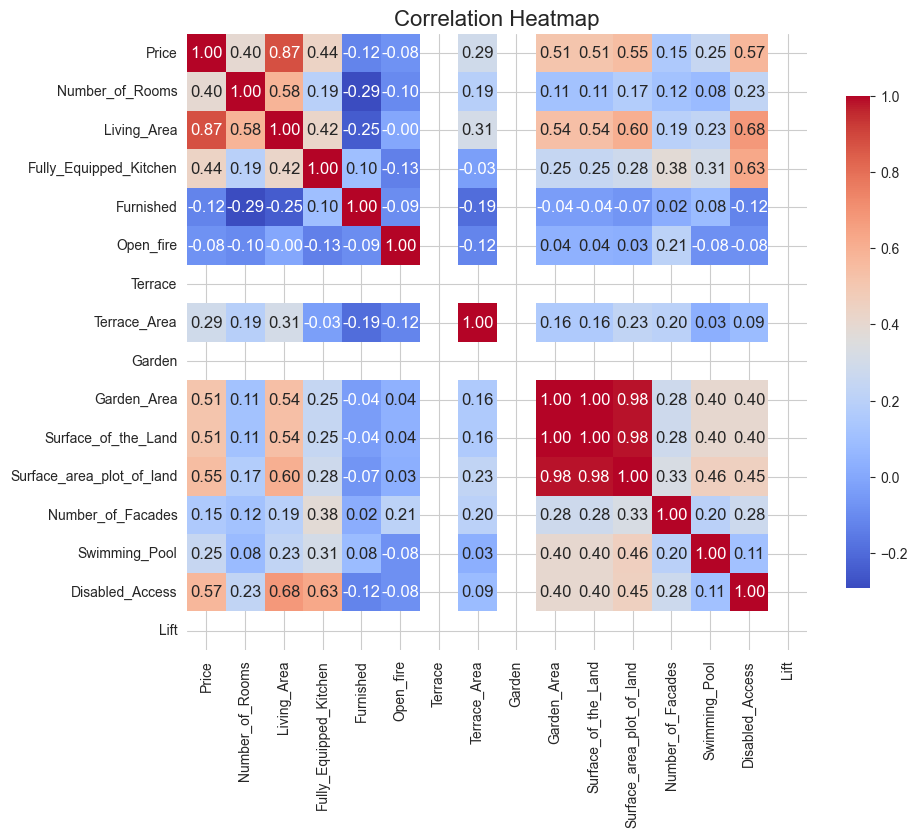

In [38]:

# Drop rows with NaN values
data = data.dropna()

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Increase the size of the plot for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 12}, cbar_kws={'shrink': 0.8})

# Set the title
plt.title("Correlation Heatmap", fontsize=16)

# Show the plot
plt.show()



In [35]:
# Correlation between price and area (if available)
data = data.dropna(subset=['Price', 'Living_Area'])
if 'Price' in data.columns and 'Living_Area' in data.columns:
    corr, p_value = pearsonr(data['Price'], data['Living_Area'])
    print(f"Correlation between price and area: {corr}, P-value: {p_value}")

# Linear Regression using Statsmodels
if 'Living_Area' in data.columns and 'Price' in data.columns:
    X = data[['Living_Area']]  # Independent variable
    X = sm.add_constant(X)  # Add a constant term
    y = data['Price']  # Dependent variable

    model = sm.OLS(y, X).fit()
    print(model.summary())


Correlation between price and area: 0.4342280983964856, P-value: 0.0
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5462.
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:36:51   Log-Likelihood:            -3.3874e+05
No. Observations:               23507   AIC:                         6.775e+05
Df Residuals:                   23505   BIC:                         6.775e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [36]:
# Train-Test Split
if all(col in data.columns for col in ['Living_Area', 'Price']):
    X = data[['Living_Area']]  # Features (example)
    y = data['Price']  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression Model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Model evaluation
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 170914212692.64185
R^2 Score: 0.22756319609976983
